# Exersice 1
We are going to work on linear regression
initially we will work on 2d points and then expand it out to 3d.

In [1]:
import numpy as np
import open3d as o3d
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#%matplotlib widget

# Generate 'random' data
np.random.seed(0)
x = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y


In D:\Programs\Anaconda\envs\perception_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Programs\Anaconda\envs\perception_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Programs\Anaconda\envs\perception_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Programs\Anaconda\envs\perception_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Programs\A

We can use Linear regression from the *sklearn* package.
Here we setup the model to fit to x and y.

In [2]:
x_r = x.reshape(-1,1) #fit needs x in this shape
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x_r, y)

We can now predict new outcomes given new data.

In [3]:
# Draw a new datapoint
tst_x = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5   
print(tst_x)
resulting_y = model.predict(tst_x)
print(resulting_y)

[[0.57704541]]
[2.18951787]


Drawing 200 new samples and plotting them as a line shows us that we have gotten a decent fit.

<IPython.core.display.Javascript object>


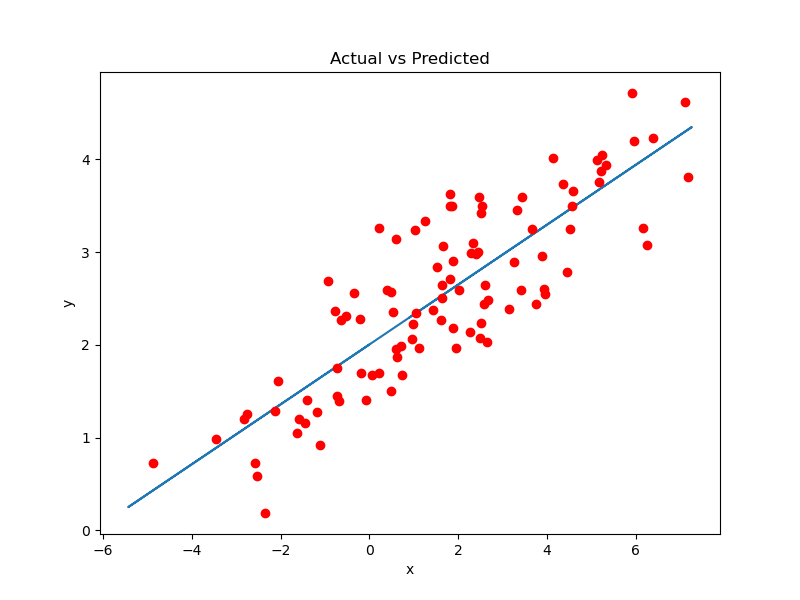

In [4]:
new_x = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
predicted = model.predict(new_x)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercises
### A
Using Ordinary Least squares attempt to get a regression line that is equal to the one sklearn provides.

Assuming
Yₑ = α + β X

![ols.gif](ols.gif "ols")

- β = Cov(X, Y) / Var(X).
- α = mean(Y)-β*mean(X)

We can now predict new outcomes given new data.

In [6]:
beta = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
alpha = np.mean(y)-beta*np.mean(x)

print(alpha, '\n' ,beta)

2.0031670124623426 
 0.3229396867092763


Drawing 200 new samples and plotting them as a line shows us that we have gotten a decent fit.

<IPython.core.display.Javascript object>


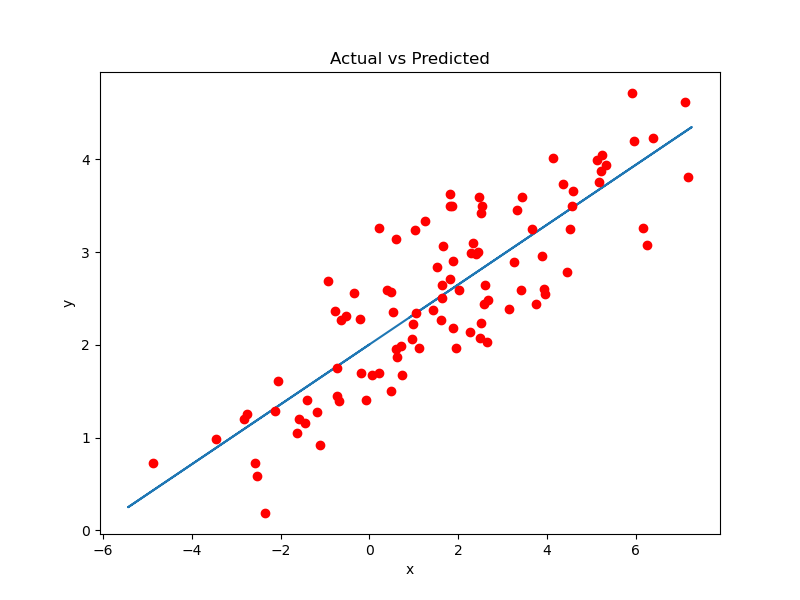

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(new_x, (alpha+beta*new_x))     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### B
Extend what we have shown above to 3D predict a plane using Linear regression given a point cloud.

Planes can be plotted with 
```{Python}
x = np.linspace(start, end, n)
y = np.linspace(start, end, n)
xx, yy = np.meshgrid(x_t, y_t)

ax.plot_surface(xx, yy, predicted_zz, alpha=0.2)
```

<IPython.core.display.Javascript object>


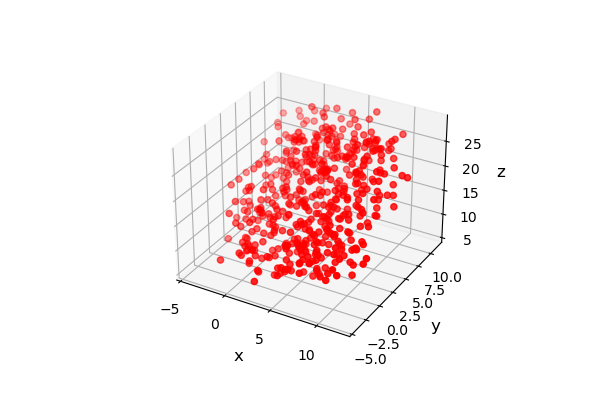

In [18]:
# Creating a pointcloud.
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()


<IPython.core.display.Javascript object>


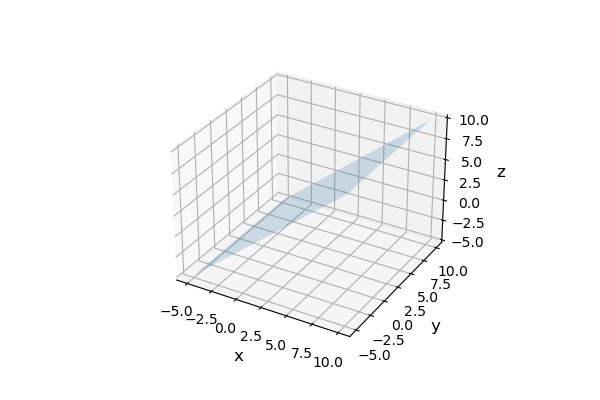

In [27]:
x = np.linspace(-5, 10, 10)
y = np.linspace(-5, 10, 10)
X = np.array(np.meshgrid(x, y))

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.plot_surface(X[0], X[1], X[0], alpha=0.2)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()
#print(X)

In [29]:
## We want to predict Z
xy = xyz[:,:2] # our inputs
z = xyz[:,2].reshape(-1,1) # our targets
X_reshape = X.reshape(2,-1).T

In [30]:
lm = LinearRegression()
model = lm.fit(xy, z)
predicted = model.predict(X_reshape)

<IPython.core.display.Javascript object>


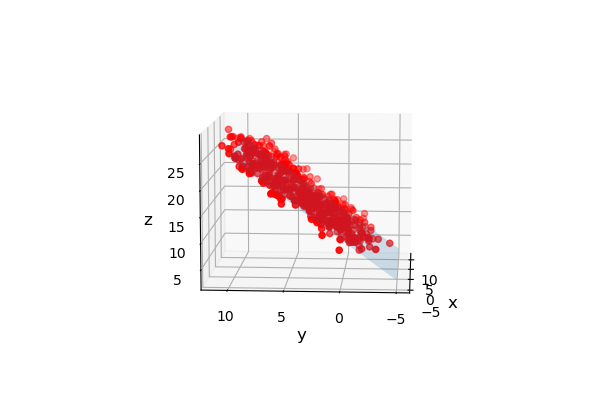

Text(0.5, 0, 'z')

In [35]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.plot_surface(X[0], X[1], predicted.reshape(X[0].shape), alpha=0.2)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)